# 9.1

In [65]:
%%latex
$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$
$\newcommand{\a}{(\alpha)}$                 
$\newcommand{\phi}{\varphi}$

<IPython.core.display.Latex object>

In [87]:
%%latex
primal problem (let $c:=\frac{C}{p}$)

\begin{align*}
\text{min} \quad
& \frac{1}{2} \norm w^2 + c \sum{\phi_{\a}} \\
\text{s.t.} \quad
& y_T^{\a}(w^Tx_{\a} + b) \ge 1 - \phi_{\a} \\
&\ \phi_{\a} \ge 0
\\
\end{align*}
                             
The Lagrangefunction with Lagrangemultipliers $\lambda, \mu$ to this is:
\begin{align*}
L &= \frac{1}{2} \norm{w}^2
    + c \sum_{\a} \phi_{\a}
    - \sum_{\a} \lambda_{\a} ( y_T^{\a}(w^Tx_{\a} -1 + \phi_{\a}))
    - \sum_{\a} \mu_{\a} \phi_{\a}
    \qquad \mid \text{extract $\phi$ from middle term}
    \\
&= \frac{1}{2} \norm{w}^2
    + c \sum_{\a} \phi_{\a}
    - \sum_{\a} \lambda_{\a} ( y_T^{\a}(w^Tx_{\a} -1))
    - \sum_{\a} \lambda_{\a} \phi_{\a}
    - \sum_{\a} \mu_{\a} \phi_{\a}
    \qquad \mid \text{rearrange}
    \\
&= \frac{1}{2} \norm{w}^2
    - \sum_{\a} \lambda_{\a} ( y_T^{\a}(w^Tx_{\a} -1))
    \qquad + c \sum_{\a} \phi_{\a}
    - \sum_{\a} \lambda_{\a} \phi_{\a}
    - \sum_{\a} \mu_{\a} \phi_{\a}
    \\
\end{align*}

Clearly, the left part of this equation is the same as before (exercise 8). 
Also, the right part doesn't contain $w$ or $b$. 
Thus the corresponding derivations are the same as in exercise 8.

For $\frac{dL}{d\phi_{\a}}$ we get:

\begin{align*}
\frac{dL}{d\phi_{\a}} = c - \lambda_{\a} - \phi_{\a} &\overset{!}{=} 0 \\
\Leftrightarrow c &= \lambda_{\a} + \phi_{\a} \qquad
\end{align*}

And since $\phi_{\a}$ is a Lagrangemultiplier, it must hold $\phi_{\a} \ge 0$:
                       
\begin{align*}
c &= \lambda_{\a} + \underbrace{\phi_{\a}}_{\ge 0} \\
\Rightarrow c &\ge \lambda_{\a}
\end{align*}

When we combine this new result with the dual problem from exercise 8 (which we can do, because the remaining derivations are the same), we get the new dual problem as shown on the current exercise sheet.

<IPython.core.display.Latex object>

# 9.3

In [89]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as pp
%matplotlib inline

the svm library assumes libsvm.so.2 is located in the directory above this one (is accessible in svm.py using "../libsvm.so.2")

In [90]:
from svm import *
from svmutil import *
prob = svm_problem([1,-1], [{1:1, 3:1}, {1:-1, 3:-1}])
param = svm_parameter('-c 4')
m = libsvm.svm_train(prob, param)
x0, max_idx = gen_svm_nodearray({1:1, 3:1})
label = libsvm.svm_predict(m, x0)

### generate test data

(80, 3) data
(80, 3) data


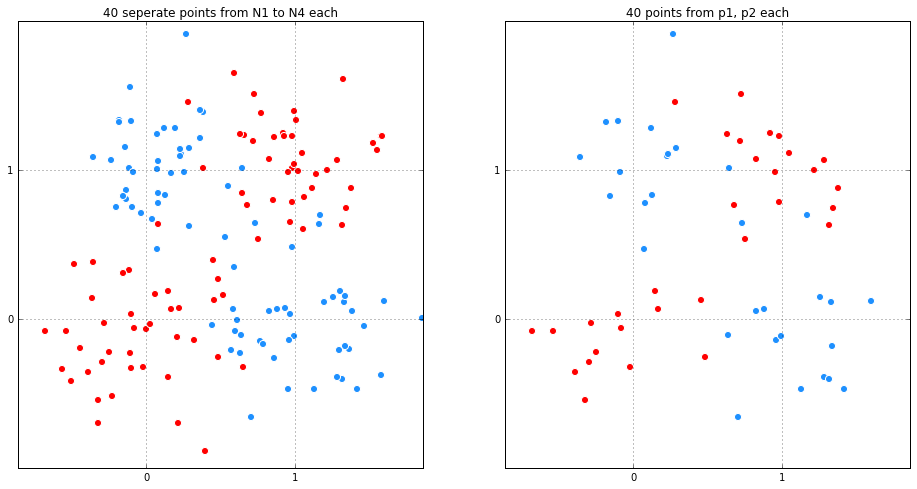

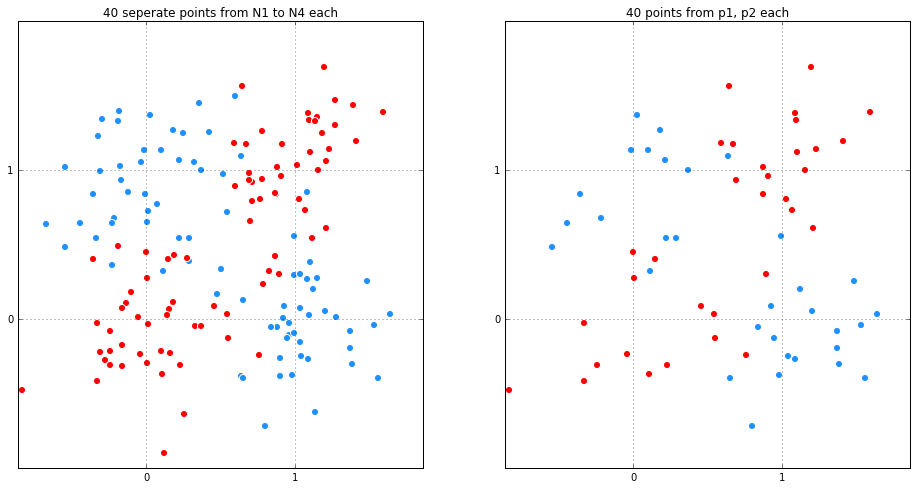

In [103]:
def scatter(data, color="dodgerblue", markers = None):
    pp.scatter(data[:,0], data[:,1], s=50, c=color, edgecolor="white")
    return

def newplot(i=1, title=""):
    if (i == 1):
        pp.figure(figsize=(16,8))
    pp.subplot(1,2,i)
    if title != "":
        pp.title(title)
    pp.axis('equal')
    pp.xticks([0, 1])
    pp.yticks([0, 1])
    pp.xlim([-1, 2])
    pp.ylim([-1, 2])
    pp.grid()
    return

def grid(min_x, max_x, n=100):
    line = np.linspace(min_x, max_x, n)
    X = np.array(np.meshgrid(line, line))  # (dims, n, n)
    Xpoints = np.vstack([X[0,:,:].reshape(n**2), X[1,:,:].reshape(n**2)]).T  # (n*n, dims)
    return X, Xpoints

def gen_data(n=80, std=np.sqrt(0.1)):
    n = int(n/2)
    X1 = np.vstack([np.random.normal(0, std, n), np.random.normal(1, std, n)])
    X2 = np.vstack([np.random.normal(1, std, n), np.random.normal(0, std, n)])

    X3 = np.vstack([np.random.normal(0, std, n), np.random.normal(0, std, n)])
    X4 = np.vstack([np.random.normal(1, std, n), np.random.normal(1, std, n)])

    newplot(1, str(n) + " seperate points from N1 to N4 each")
    for X in [X1, X2]:
        scatter(X.T)
    for X in [X3, X4]:
        scatter(X.T, "red")

    newplot(2, str(n) + " points from p1, p2 each")
    Xp1 = np.hstack([X1, X2]).T
    Xp1 = Xp1[np.random.choice(n*2, n), :]
    # scatter(Xp1)
    Xp2 = np.hstack([X3, X4]).T
    Xp2 = Xp2[np.random.choice(n*2, n), :]
    # scatter(Xp2, "red")

    Y = np.hstack([-np.ones(n), np.ones(n)])
    data = np.vstack([np.hstack([Xp1.T, Xp2.T]), Y]).T
    scatter(data[data[:,2]==-1])
    scatter(data[data[:,2]==1], "red")
    print(data.shape, "data")
    return data

dataset = gen_data(80)
testset = gen_data(80)

### train with RBF-Kernel (default parameters), visualize results

parameter description for svm_train:

predicting Xtest labels
Accuracy = 78.75% (63/80) (classification)
accuracy: 78.750000 
mean square error: 0.850000 
squared correlation coefficient: 0.335873


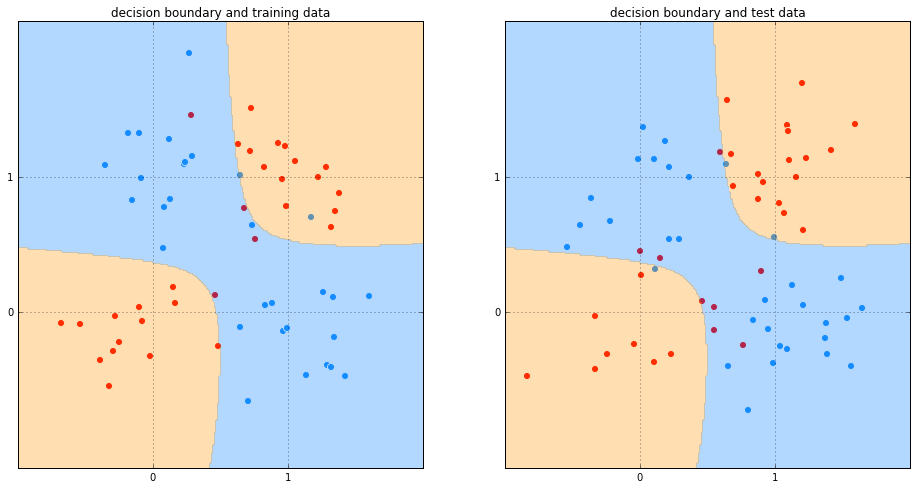

In [114]:
def ex93a(dataset=dataset, testset=testset):
    Ytrain = dataset[:,2]
    Xtrain = dataset[:,:2]
    Xtest = testset[:,:2]
    Ytest = testset[:,2]
    
    # (a) TRAIN MODEL
    # 1/2 = (default gamma) != (datagen gamma) = 1/(2(std**2)) = 1/0.2 = 5
    # i.e. you should get better results with '-g 5'
    m = svm_train(Ytrain.tolist(), Xtrain.tolist(), '-t 2')
    
    # (b) PREDICT LABELS
    print("predicting Xtest labels")
    p_labs, p_acc, p_vals = svm_predict(Ytest.tolist(), Xtest.tolist(), m)
    print("accuracy: %f \nmean square error: %f \nsquared correlation coefficient: %f" % p_acc)
    labels = np.array(p_labs)

    # (c) PLOT RESULTS
    # calc decision boundary
    n = 300
    X, X_ = grid(-1.2, 2.2, n)
    # predicting labels for decision boundary
    p_labs, p_acc, p_vals = svm_predict([0]*(n*n), X_.tolist(), m, "-q")
    grid_labels = np.array(p_labs).reshape((n,n))
    
    newplot(1, "decision boundary and training data")
    scatter(Xtrain[Ytrain==-1.0,:], "dodgerblue")
    scatter(Xtrain[Ytrain==1.0,:], "red")
    pp.contourf(X[0,:,:], X[1,:,:], grid_labels, alpha=0.3, levels=[-1, 0, 1.])
    
    newplot(2, "decision boundary and test data")
    scatter(Xtest[Ytest==-1.0,:2], "dodgerblue")
    scatter(Xtest[Ytest==1.0,:2], "red")
    pp.contourf(X[0,:,:], X[1,:,:], grid_labels, alpha=0.3, levels=[-1, 0, 1.])
    return

ex93a()

# 9.4

In [150]:
def gridsearch(dataset=dataset, testset=testset):
    # used to test final parameters determined by crossvalidation
    Xtest = testset[:,:2]
    Ytest = testset[:,2]
    
    Cs = 2**np.arange(-5,17,2).astype(float)  # complexity punishment
    Gs = 2**np.arange(-15,5,2).astype(float)  # tries to find gamma* = 1/(2*std**2)
    c_best = 0
    g_best = 0
    acc_best = np.inf
    
    k = 5  # number of partitions in k-fold-crossvalidation
    n = int(len(dataset)/k)  # number of elements per partition
    data_parts = [dataset[i*n:i*n+n] for i in range(0, k)]
    
    m = None  # model

    # gridsearch (= try all combinations)
    for c in Cs:
        for g in Gs:
            
            # crossvalidation
            accuracy = []
            for i,current in enumerate(data_parts):
            
                # train on parts\current
                data = np.vstack([part for j,part in enumerate(data_parts) if j != i])
                X = data[:,:2].tolist()
                Y = data[:,2].tolist()
                m = svm_train(Y, X, '-t 2 -c %f -g %f -q' % (c, g))
                
                # validate on current
                X = current[:,:2].tolist()
                Y = current[:,2].tolist()
                p_labs, p_acc, p_vals = svm_predict(Y, X, m, "-q")
                
                accuracy.append(p_acc[1])
            acc_mean = np.array(accuracy).mean()
                
            if (acc_mean < acc_best):
                c_best = c
                g_best = g
                acc_best = acc_mean
                print(acc_mean)
    
    # test on testset

    return c_best, g_best, acc_best
gridsearch()

3.55
3.5
3.4
3.25
1.35
1.05
0.65
0.6
0.55
0.5
0.45
0.4


(512.0, 0.5, 0.40000000000000002)

In [119]:
for i in range(100): print("")